# PPGCOMP - FURG | 23148P - Data Visualization and Exploratory Data Analysis | 02/2024 
This notebook contains the solution for Task 04 of the course 23148P - Data Visualization and Exploratory Data Analysis - 02/2024 of the Graduate Program in Computing at FURG (PPGCOMP-FURG).

**Professor:** Dr. Adriano Velasque Werhli.

**Student:** Vitor Avelaneda.

* **Contact:** avelaneda.vitor@gmail.com

The repository with the notebooks can be accessed [here!](https://github.com/vitoravelaneda/23148P-Data_Visualization_and_Exploratory_Data_Analysis-PPGCOMP-FURG)

## Task:

In the zip file you find a data set and a graph that was produced with this data set. For producing this graph the data has to go through some transformations using functions like:

pivot_longer(), separate_wider_delim(),  pivot_wider()

Try to produce [the same graph](./basketball/basketball.pdf) and handle the R code as the result. 

## Solution

**Package Installation and Loading:**

Install packages if not already installed

In [1]:
if (!requireNamespace("readr", quietly = TRUE)) install.packages("readr")
if (!requireNamespace("tidyverse", quietly = TRUE)) install.packages("tidyverse")
if (!requireNamespace("ggplot2", quietly = TRUE)) install.packages("ggplot2")

Load the necessary libraries


In [2]:
library(readr)
library(tidyverse)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.2
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


**Reading the Data:**

In [3]:
my.data <- read_csv("./basketball/Basketball.csv")

Rows: 16 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): male.player, female.player, stat
dbl (2): year, amount

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


**Inspecting the Data:**

In [4]:
head(my.data)
View(my.data)
glimpse(my.data)

male.player,female.player,year,stat,amount
<chr>,<chr>,<dbl>,<chr>,<dbl>
A,E,1,points,14
A,E,1,assists,6
A,E,2,points,18
A,E,2,assists,7
B,F,1,points,22
B,F,1,assists,9


male.player,female.player,year,stat,amount
<chr>,<chr>,<dbl>,<chr>,<dbl>
A,E,1,points,14
A,E,1,assists,6
A,E,2,points,18
A,E,2,assists,7
B,F,1,points,22
B,F,1,assists,9
B,F,2,points,38
B,F,2,assists,4
C,G,1,points,16


Rows: 16
Columns: 5
$ male.player   <chr> "A", "A", "A", "A", "B", "B", "B", "B", "C", "C", "C", "…
$ female.player <chr> "E", "E", "E", "E", "F", "F", "F", "F", "G", "G", "G", "…
$ year          <dbl> 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2
$ stat          <chr> "points", "assists", "points", "assists", "points", "ass…
$ amount        <dbl> 14, 6, 18, 7, 22, 9, 38, 4, 16, 5, 21, 6, 20, 5, 21, 8


**Tidying the Data:**

Transforming the data to a long format and relabeling gender

In [5]:
my_data_tidy <- my.data %>%
  pivot_longer(cols = c(female.player, male.player),    
               names_to = "gender",                    
               values_to = "player") %>%              
  mutate(gender = ifelse(gender == "female.player", "female", "male"))

Spreading the data so that different statistics appear as separate columns

In [6]:
my_data_tidy <- my_data_tidy %>%
  pivot_wider(names_from = stat,       
              values_from = amount)

Grouping and arranging by player for easier visualization

In [7]:
my_data_tidy <- my_data_tidy %>%
  group_by(player) %>%  
  arrange(player)

**Viewing the Transformed Data:**

In [8]:
View(my_data_tidy)
glimpse(my_data_tidy)

year,gender,player,points,assists
<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,male,A,14,6
2,male,A,18,7
1,male,B,22,9
2,male,B,38,4
1,male,C,16,5
2,male,C,21,6
1,male,D,20,5
2,male,D,21,8
1,female,E,14,6


Rows: 16
Columns: 5
Groups: player [8]
$ year    <dbl> 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2
$ gender  <chr> "male", "male", "male", "male", "male", "male", "male", "male"…
$ player  <chr> "A", "A", "B", "B", "C", "C", "D", "D", "E", "E", "F", "F", "G…
$ points  <dbl> 14, 18, 22, 38, 16, 21, 20, 21, 14, 18, 22, 38, 16, 21, 20, 21
$ assists <dbl> 6, 7, 9, 4, 5, 6, 5, 8, 6, 7, 9, 4, 5, 6, 5, 8


**Converting Year to a Factor:**

In [9]:
my_data_tidy <- my_data_tidy %>%
  mutate(year = as.factor(year))

**Data Visualization Plot:**

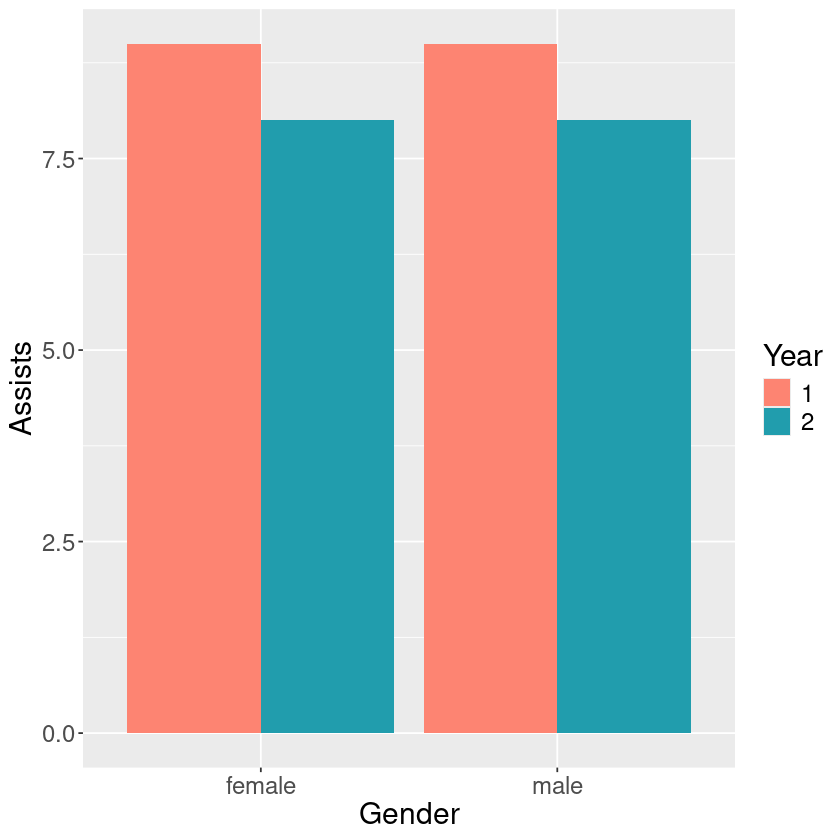

In [10]:
ggplot(my_data_tidy, aes(x = gender, y = assists, fill = year)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(x = "Gender", y = "Assists") +
  theme_gray() +
  theme(
    text = element_text(size = 18)) +
  scale_fill_manual(name = "Year",values = c("1" = "#fd8472", "2" = "#219dad"))